## Removing Outliers

In [12]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [71]:
tips = sns.load_dataset('tips')

In [72]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


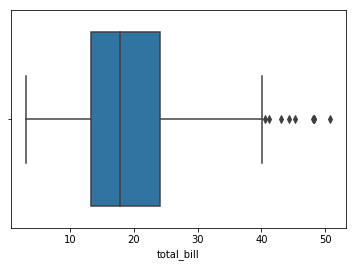

In [73]:
sns.boxplot(tips['total_bill'])
plt.show()

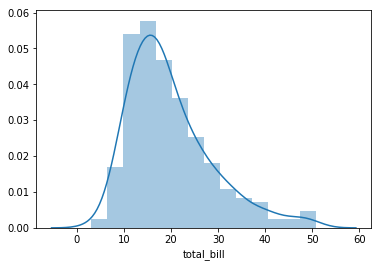

In [74]:
sns.distplot(tips['total_bill'])
plt.show()

In [75]:
tips['total_bill'].skew()

1.1332130376158205

In [76]:
tips['total_bill'].kurt()

1.2184840156638854

### Using Z-Score

In [77]:
tips['abs_zscore'] = abs(zscore(tips['total_bill']))

In [78]:
tips2 = tips[~(tips['abs_zscore'] > 3)]
tips2.shape

(240, 8)

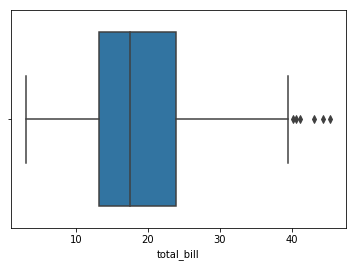

In [79]:
sns.boxplot(tips2['total_bill'])
plt.show()

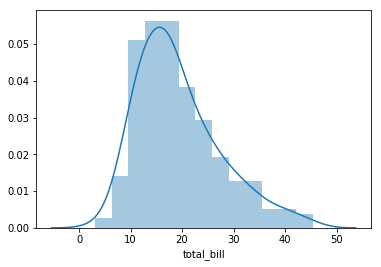

In [91]:
sns.distplot(tips2['total_bill'])
plt.show()

In [81]:
tips2['total_bill'].skew()

0.9148510261489988

In [82]:
tips2['total_bill'].kurt()

0.5355590055930715

### Using IQR

In [88]:
q1 = tips['total_bill'].quantile(0.25)
q3 = tips['total_bill'].quantile(0.75)
iqr = q3 - q1

In [95]:
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

In [98]:
ll

-2.8224999999999945

In [100]:
tips3 = tips[~((tips['total_bill']<ll)|(tips['total_bill']>ul))]
tips3.shape

(235, 8)

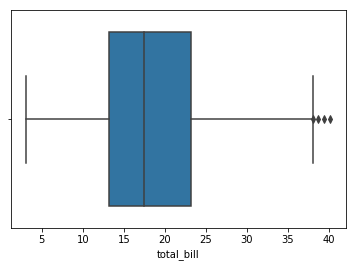

In [102]:
sns.boxplot(tips3['total_bill'])
plt.show()

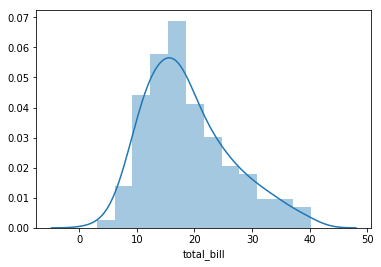

In [139]:
sns.distplot(tips3['total_bill'])
plt.show()

In [104]:
tips3['total_bill'].skew()

0.7255976389840281

In [105]:
tips3['total_bill'].kurt()

0.050898514819063934

In [110]:
DataFrame({'Skew':[tips['total_bill'].skew(),tips2['total_bill'].skew(),tips3['total_bill'].skew()],
           'Kurtosis':[tips['total_bill'].kurt(),tips2['total_bill'].kurt(),tips3['total_bill'].kurt()]},
            index=['Original','After removing outliers using Z-Score','Afetr removing outliers using IQR'])

,Skew,Kurtosis
Original,1.133213,1.218484
After removing outliers using Z-Score,0.914851,0.535559
Afetr removing outliers using IQR,0.725598,0.050899


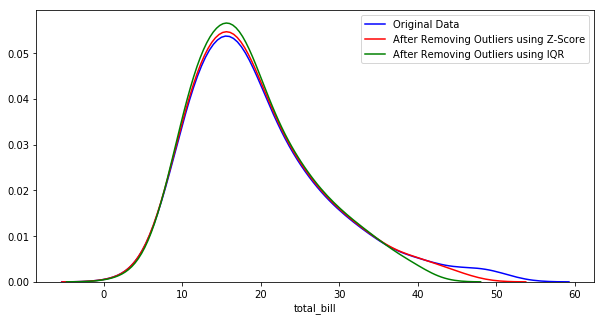

In [112]:
plt.figure(figsize=(10,5))
sns.distplot(tips['total_bill'],hist=False,color='blue',label='Original Data')
sns.distplot(tips2['total_bill'],hist=False,color='red',label='After Removing Outliers using Z-Score')
sns.distplot(tips3['total_bill'],hist=False,color='green',label='After Removing Outliers using IQR')
plt.show()

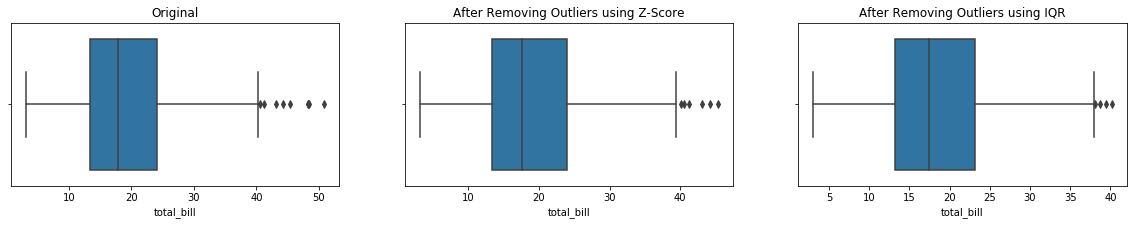

In [136]:
fig,ax = plt.subplots(1,3,figsize=(20,3))
sns.boxplot(tips['total_bill'],ax=ax[0])
sns.boxplot(tips2['total_bill'],ax=ax[1])
sns.boxplot(tips3['total_bill'],ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('After Removing Outliers using Z-Score')
ax[2].set_title('After Removing Outliers using IQR')
plt.show()

In [155]:
titanic = pd.read_csv('Titanictrain.csv')

In [156]:
titanic.drop(columns=['Cabin','Name'],inplace=True)
titanic.dropna(subset=['Embarked'],inplace=True)
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age,inplace=True)

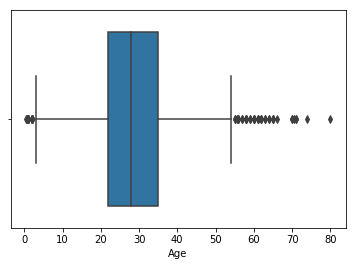

In [157]:
sns.boxplot(titanic['Age'])
plt.show()

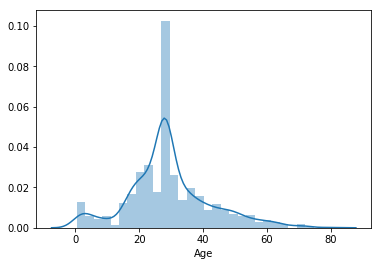

In [158]:
sns.distplot(titanic['Age'])
plt.show()

In [159]:
titanic['Age'].skew()

0.5080100783148638

In [160]:
titanic['Age'].kurt()

1.0078198132258307

In [161]:
titanic['abs_zscore'] = abs(zscore(titanic['Age']))

In [164]:
titanic2 = titanic[~(titanic['abs_zscore'] > 3)]
titanic2.shape

(882, 11)

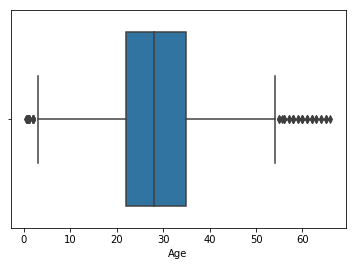

In [165]:
sns.boxplot(titanic2['Age'])
plt.show()

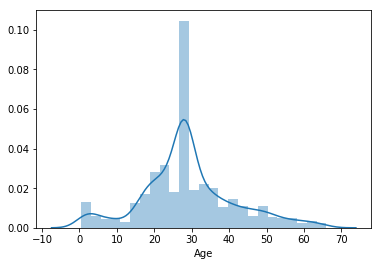

In [166]:
sns.distplot(titanic2['Age'])
plt.show()

In [167]:
titanic2['Age'].skew()

0.32806200093182986

In [168]:
titanic2['Age'].kurt()

0.6245513767704955

In [169]:
q1 = titanic['Age'].quantile(0.25)
q3 = titanic['Age'].quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

In [171]:
titanic3 = titanic[~((titanic['Age']<ll)|(titanic['Age']>ul))]
titanic3.shape

(824, 11)

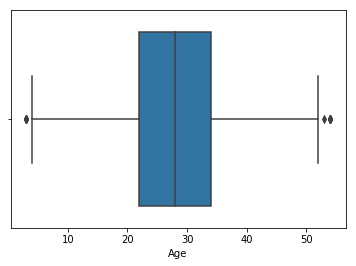

In [172]:
sns.boxplot(titanic3['Age'])
plt.show()

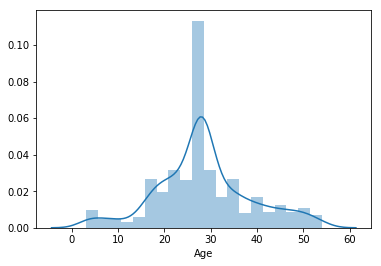

In [173]:
sns.distplot(titanic3['Age'])
plt.show()

In [174]:
titanic3['Age'].skew()

0.17180177363565172

In [175]:
titanic3['Age'].kurt()

0.36014219967487815

In [176]:
DataFrame({'Skew':[titanic['Age'].skew(),titanic2['Age'].skew(),titanic3['Age'].skew()],
           'Kurtosis':[titanic['Age'].kurt(),titanic2['Age'].kurt(),titanic3['Age'].kurt()]},
            index=['Original','After removing outliers using Z-Score','Afetr removing outliers using IQR'])

,Skew,Kurtosis
Original,0.508010,1.007820
After removing outliers using Z-Score,0.328062,0.624551
Afetr removing outliers using IQR,0.171802,0.360142


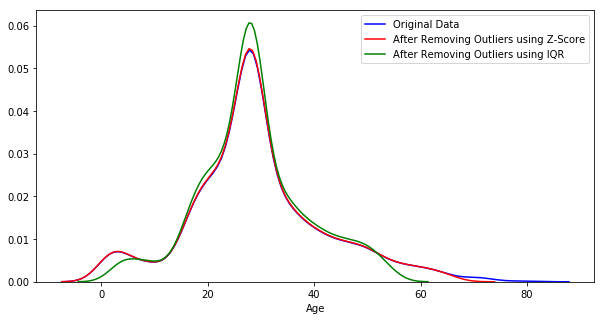

In [177]:
plt.figure(figsize=(10,5))
sns.distplot(titanic['Age'],hist=False,color='blue',label='Original Data')
sns.distplot(titanic2['Age'],hist=False,color='red',label='After Removing Outliers using Z-Score')
sns.distplot(titanic3['Age'],hist=False,color='green',label='After Removing Outliers using IQR')
plt.show()

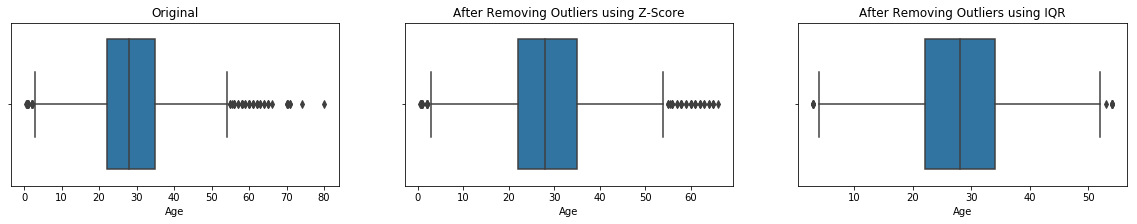

In [178]:
fig,ax = plt.subplots(1,3,figsize=(20,3))
sns.boxplot(titanic['Age'],ax=ax[0])
sns.boxplot(titanic2['Age'],ax=ax[1])
sns.boxplot(titanic3['Age'],ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('After Removing Outliers using Z-Score')
ax[2].set_title('After Removing Outliers using IQR')
plt.show()

In [180]:
np.where(titanic['abs_zscore']>3)

(array([ 95, 115, 492, 629, 671, 744, 849], dtype=int64),)